In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


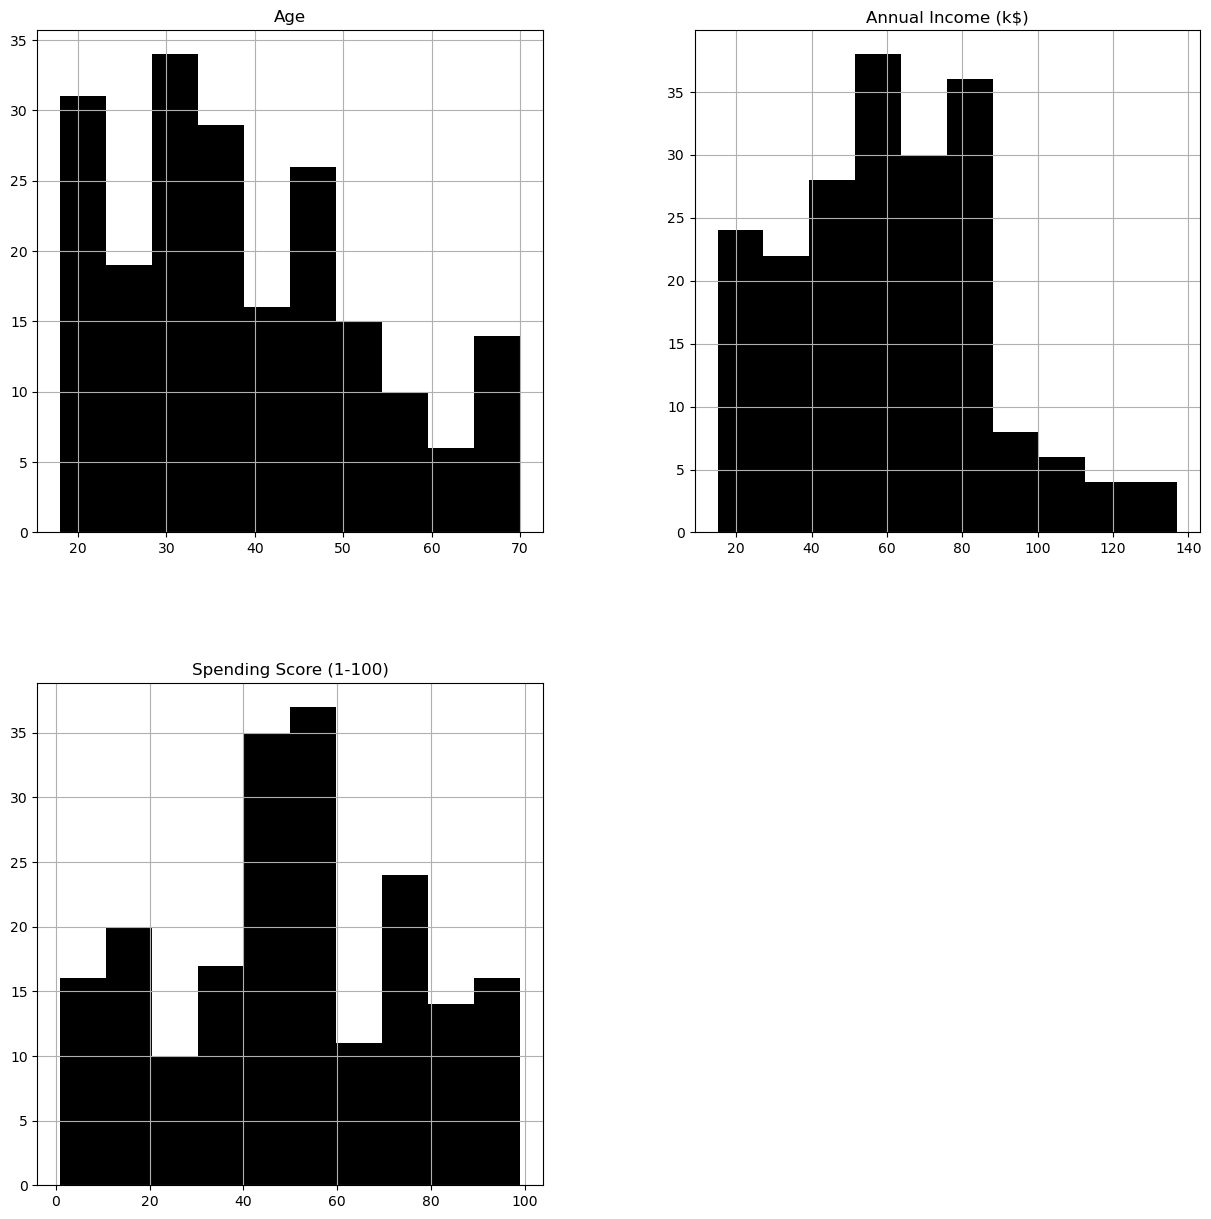

In [5]:
df.iloc[:,1:].hist(figsize=(15,15),color='black');

In [6]:
X = df[["Spending Score (1-100)", "Annual Income (k$)"]] #choosing the features 

In [7]:
X_scaled= StandardScaler().fit_transform(X)

In [8]:
warnings.filterwarnings("ignore")
# removes a warning message

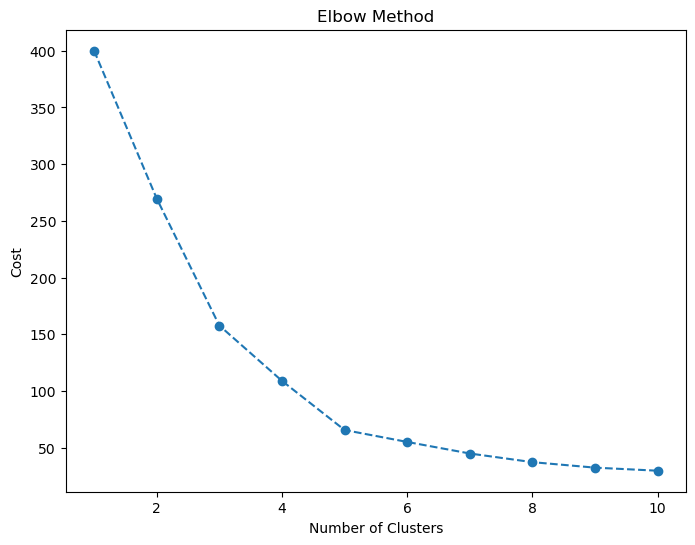

In [9]:

Cost = []  # We're saving each cost value in a list to visualize which K is the best 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=15)
    kmeans.fit(X_scaled)
    Cost.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), Cost, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()



# K = 5 is a reasonable choice as it's the elbow point

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


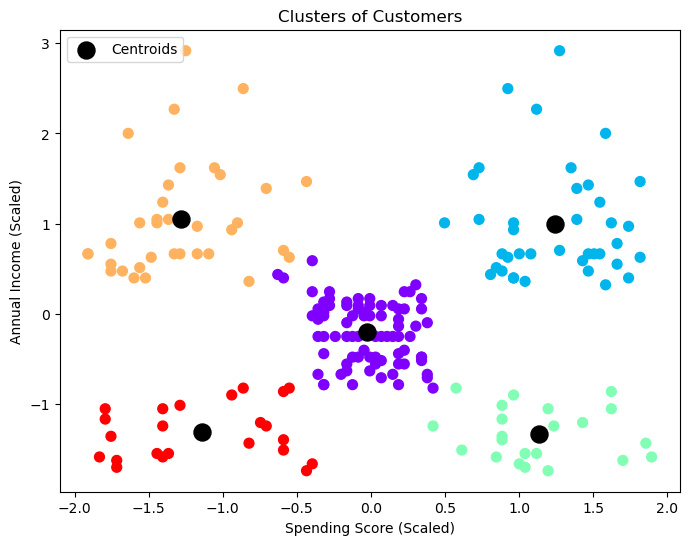

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Spending Score (Scaled)')
plt.ylabel('Annual Income (Scaled)')
plt.legend()
plt.show()


## We can see that the customers are devided by 5 categories, it's not ideal but 5 looks appropriate, we can translate that into
### 1) top left which is people that have money and likes to save more than spending
### 2) top left which is people that have money and likes to spend more, assumtion:(their savings aren't a priority)
### 3) the middle which is people that earn a minimum wage and above but likes to spend some of it
### 4) bottom left are people that have minimum wage salary and they don't spend much money
### 5) bottom right are people that have minimum wage salary and they spend much in the mall